In [0]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
#for Heirarchial clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
#PCA
from sklearn.decomposition import PCA
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
#Read training data file

trainfile = r'/gdrive/My Drive/CIS 508 Python/Assignment-5/Wholesale_customers_data.csv'
trainData = pd.read_csv(trainfile)

trainData_cpy = trainData

# copy of train data and test data to perform pre processing
cpy_traindata = trainData.copy()
trainData.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
#Analysing data
print("Classification on channel\n",  trainData.groupby('Channel')['Channel'].count())
print("Classification on region\n",  trainData.groupby('Region')['Region'].count())
print("Milk\n",  trainData['Milk'].sum())
print("Frozen\n",  trainData['Frozen'].sum())
print("Shape of training data", trainData.shape)
trainData.describe()

Classification on channel
 Channel
1    298
2    142
Name: Channel, dtype: int64
Classification on region
 Region
1     77
2     47
3    316
Name: Region, dtype: int64
Milk
 2550357
Frozen
 1351650
Shape of training data (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
# remove channel and region
trainData = trainData.iloc[:, 2:]
trainData.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# K Means

In [4]:
# using default k means has 8 clusters
kmeans_model = KMeans()
kmeans_model.fit(trainData)
print("Silhouette score for clustering:",   silhouette_score(trainData, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.3642754191240703
Sum of squared distances for clustering: 36242393778.11966


In [18]:
#Random Hyperparameter tuning for neural networks model
print("RandomizedSearchCV-Kmeans")
parameters={'n_clusters': range(2,30,1), 'init': ['k-means++', 'random'],'tol': [0.0001,0.00001]}
nn_random = RandomizedSearchCV(kmeans_model,parameters, cv=5)
nn_random.fit(trainData)
nn_rand_parm=nn_random.best_params_
print(nn_rand_parm)

RandomizedSearchCV-Kmeans
{'tol': 0.0001, 'n_clusters': 22, 'init': 'k-means++'}


In [17]:
# using default k means 
kmeans_model = KMeans(**nn_rand_parm)
kmeans_model.fit(trainData)
print("Silhouette score for clustering:",   silhouette_score(trainData, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.23874323805865824
Sum of squared distances for clustering: 10572660492.079815


In [0]:
#Finding optimal value for number of clusters -k
Sum_of_squared_distances = []
sil_mat = []
K = range(2,70)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model = kmeans_model.fit(trainData)
    Sum_of_squared_distances.append(kmeans_model.inertia_)
    sil_mat.append(silhouette_score(trainData, kmeans_model.labels_))

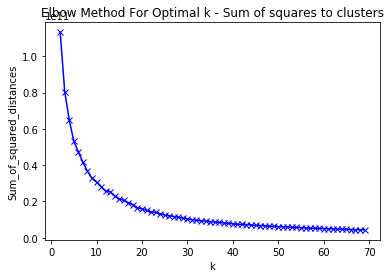

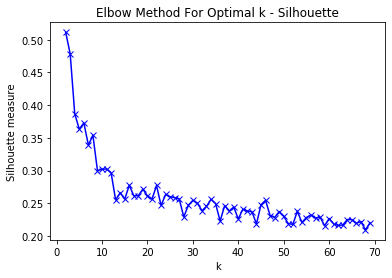

In [0]:
#Plot elbow curve using sum of sqaures
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k - Sum of squares to clusters')
plt.show()

#Plot elbow curve using silhouette measure
plt.plot(K, sil_mat, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette measure')
plt.title('Elbow Method For Optimal k - Silhouette')
plt.show()

In [20]:
# using default k means 
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(trainData)
print("Silhouette score for clustering:",   silhouette_score(trainData, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.47977587145684614
Sum of squared distances for clustering: 80333265953.4602


In [21]:
kmeans_model.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
#Add Cluster Number to each datapoint + save file
df_kmeans=trainData
df_kmeans['Cluster Number']=kmeans_model.predict(trainData)
df_kmeans['Channel'] = trainData_cpy['Channel']
df_kmeans['Region'] = trainData_cpy['Region']
print(df_kmeans.shape)
df_kmeans.head()
export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508 Python/Assignment-5/Prob2_KmeansClusters_4.csv')

(440, 9)


Channel           1   2
Cluster Number         
0               244  86
1                 2  48
2                52   8


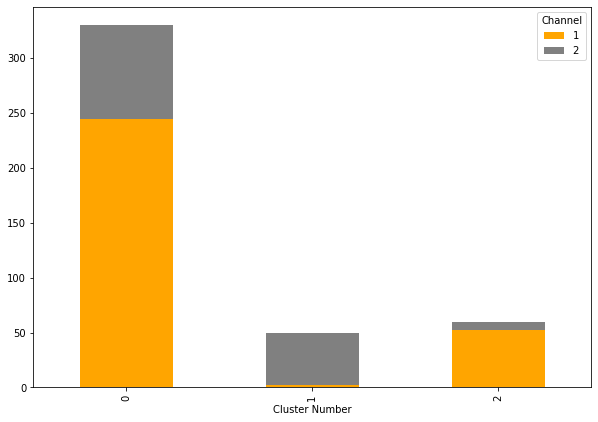

In [0]:
#channel cluster break up
pivot_df = df_kmeans.pivot_table(index='Cluster Number', columns='Channel', values='Milk', aggfunc = len)
print(pivot_df)
#channel cluster
colors = ["orange", "grey"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7))

Region           1   2    3
Cluster Number             
0               56  35  239
1               10   8   32
2               11   4   45


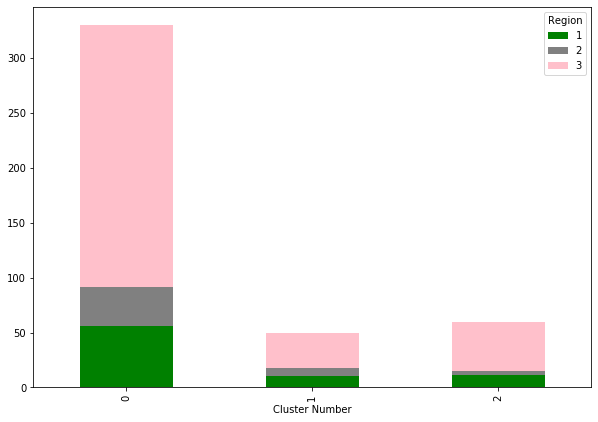

In [0]:
#region cluster break up
pivot_df = df_kmeans.pivot_table(index='Cluster Number', columns='Region', values='Milk', aggfunc = len)
print(pivot_df)
#region cluster
colors = ["green", "grey", "pink"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7))

                   Milk    Fresh  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster Number                                                                 
0               1262119  2723645  1742550  848978            585109      375374
1                925571   400002  1378695   99834            620368      112601
2                362667  2156484   377317  402838             62380      182968


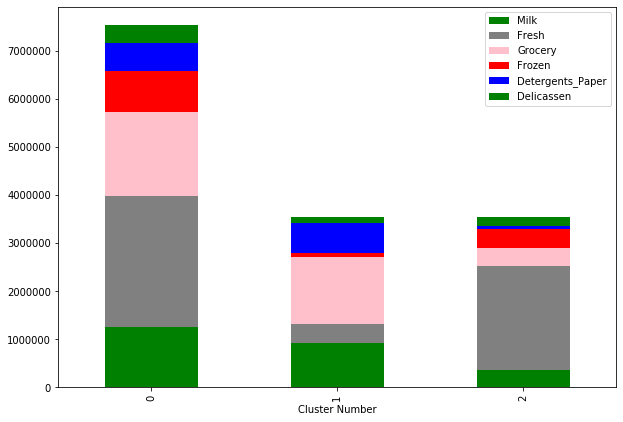

In [0]:
#product cluster break up
pivot_df_1 = df_kmeans.pivot_table(index='Cluster Number', values='Milk', aggfunc = np.sum)
pivot_df_2 = df_kmeans.pivot_table(index='Cluster Number', values='Fresh', aggfunc = np.sum)
pivot_df_3 = df_kmeans.pivot_table(index='Cluster Number', values='Grocery', aggfunc = np.sum)
pivot_df_4 = df_kmeans.pivot_table(index='Cluster Number', values='Frozen', aggfunc = np.sum)
pivot_df_5 = df_kmeans.pivot_table(index='Cluster Number', values='Detergents_Paper', aggfunc = np.sum)
pivot_df_6 = df_kmeans.pivot_table(index='Cluster Number', values='Delicassen', aggfunc = np.sum)
pivot_df_1['Fresh'] = pivot_df_2['Fresh']
pivot_df_1['Grocery'] = pivot_df_3['Grocery']
pivot_df_1['Frozen'] = pivot_df_4['Frozen']
pivot_df_1['Detergents_Paper'] = pivot_df_5['Detergents_Paper']
pivot_df_1['Delicassen'] = pivot_df_6['Delicassen']
print(pivot_df_1)
#product cluster
colors = ["green", "grey", "pink","red","blue"]
pivot_df_1.plot.bar(stacked=True, color=colors, figsize=(10,7))

# PCA + Kmeans

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(trainData)
principalDf = pd.DataFrame(data = principalComponents, columns= ['principal component 1','principal component 2'] )

In [0]:
# using default k means 
kmeans_model_pca = KMeans(n_clusters= 4, init='k-means++', n_jobs = -1)
kmeans_model_pca.fit(principalDf)
print("Silhouette score for clustering:",   silhouette_score(principalDf, kmeans_model_pca.labels_))
print("Sum of squared distances for clustering:", kmeans_model_pca.inertia_)

Silhouette score for clustering: 0.46235710643982336
Sum of squared distances for clustering: 43781540413.66852


In [0]:
#Finding optimal value for number of clusters -k
Sum_of_squared_distances = []
sil_mat = []
K = range(2,70)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model = kmeans_model.fit(principalDf)
    Sum_of_squared_distances.append(kmeans_model.inertia_)
    sil_mat.append(silhouette_score(principalDf, kmeans_model.labels_))

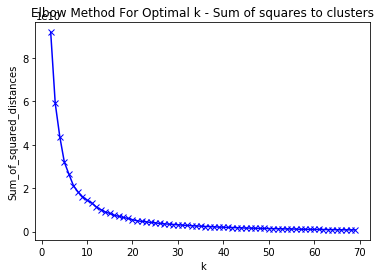

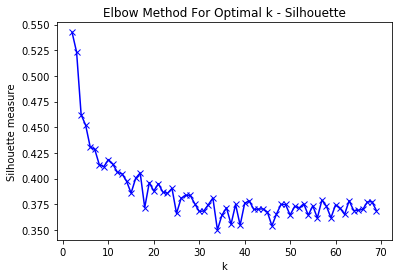

In [25]:
#Plot elbow curve using sum of sqaures
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k - Sum of squares to clusters')
plt.show()

#Plot elbow curve using silhouette measure
plt.plot(K, sil_mat, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette measure')
plt.title('Elbow Method For Optimal k - Silhouette')
plt.show()

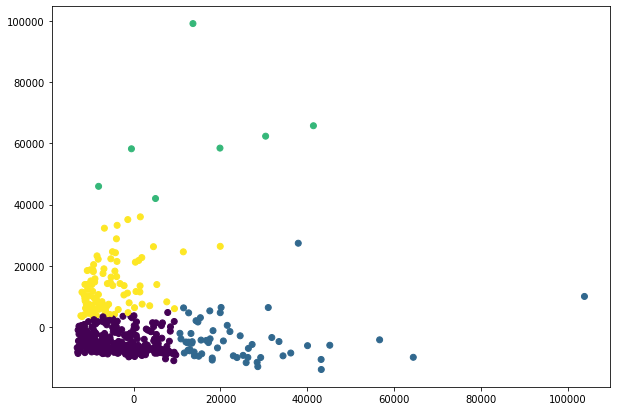

In [0]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans_model.labels_) 

In [0]:
#Add Cluster Number to each datapoint + save file
df_kmeans_pca=trainData
df_kmeans_pca['Cluster Number']=kmeans_model_pca.predict(principalDf)
df_kmeans_pca['Channel'] = trainData_cpy['Channel']
df_kmeans_pca['Region'] = trainData_cpy['Region']
print(df_kmeans_pca.shape)
df_kmeans_pca.head()
#export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508 Python/Assignment-5/Prob2_KmeansClusters_4.csv')

(440, 9)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster Number,Channel,Region
0,12669,9656,7561,214,2674,1338,0,2,3
1,7057,9810,9568,1762,3293,1776,2,2,3
2,6353,8808,7684,2405,3516,7844,0,2,3
3,13265,1196,4221,6404,507,1788,0,1,3
4,22615,5410,7198,3915,1777,5185,3,2,3


Channel             1     2
Cluster Number             
0               235.0  44.0
1                 NaN   7.0
2                12.0  83.0
3                51.0   8.0


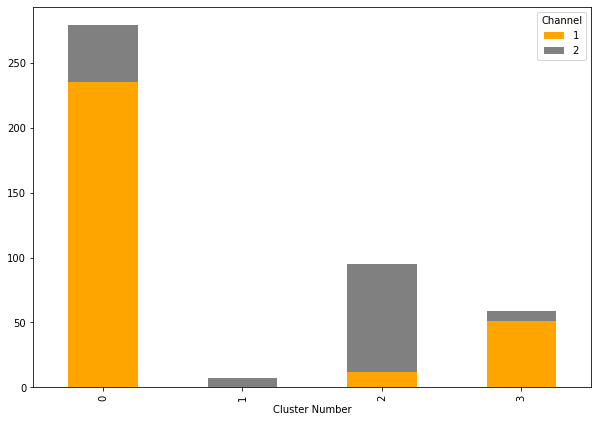

In [0]:
#channel cluster break up
pivot_df = df_kmeans_pca.pivot_table(index='Cluster Number', columns='Channel', values='Milk', aggfunc = len)
print(pivot_df)
#channel cluster
colors = ["orange", "grey"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7))

                  Milk    Fresh  Grocery  Frozen  Detergents_Paper  Delicassen
Cluster Number                                                                
0               835570  2508140  1035970  777764            276829      287185
1               397566   218771   500692   69618            235588       92554
2               999876   456840  1606430  138946            693728      156834
3               317345  2096380   355470  365322             61712      134370


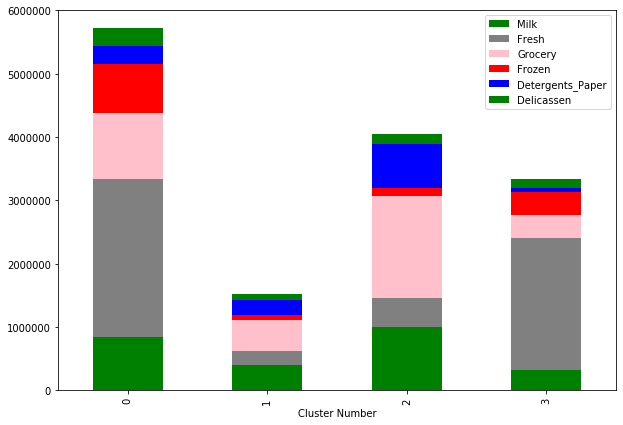

In [0]:
#region cluster break up
pivot_df_1 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Milk', aggfunc = np.sum)
pivot_df_2 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Fresh', aggfunc = np.sum)
pivot_df_3 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Grocery', aggfunc = np.sum)
pivot_df_4 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Frozen', aggfunc = np.sum)
pivot_df_5 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Detergents_Paper', aggfunc = np.sum)
pivot_df_6 = df_kmeans_pca.pivot_table(index='Cluster Number', values='Delicassen', aggfunc = np.sum)
pivot_df_1['Fresh'] = pivot_df_2['Fresh']
pivot_df_1['Grocery'] = pivot_df_3['Grocery']
pivot_df_1['Frozen'] = pivot_df_4['Frozen']
pivot_df_1['Detergents_Paper'] = pivot_df_5['Detergents_Paper']
pivot_df_1['Delicassen'] = pivot_df_6['Delicassen']
print(pivot_df_1)
#region cluster
colors = ["green", "grey", "pink","red","blue"]
pivot_df_1.plot.bar(stacked=True, color=colors, figsize=(10,7))